# Install external libraries


In [3]:
!pip install soundfile

# General imports


In [102]:
import soundfile
import numpy as np
import librosa
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier

In [56]:
emotions = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}


base_path = '/content/drive/My Drive/UEPG/eng-comp/5-ano/tcc-v2/'
audios_path = 'SER/datasets/RAVDESS/audio-speech/'

In [57]:
def extract_feature(file_name, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma or contrast:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, contrast))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            result = np.hstack((result, tonnetz))
    return result

In [85]:
 
def load_data(test_size=0.25):
  X, y = [], []
  try:
    done = 0
    exceptions = 0
    path = base_path + audios_path

    file_names = os.listdir(path)
    
    total_files = len(file_names)
    print("Total files: {}".format(total_files))
    
    for filename in file_names:
      try:
        done += 1
        print("Processing {} of {} files".format(done, total_files))
      
        # get the base name of the audio file
        emotion_label = filename.split("-")[2]
        # get the emotion label
        emotion = emotions.get(emotion_label)

        audio_file = path + filename
        features = extract_feature(audio_file, mfcc=True, chroma=True, mel=True)

        X.append(features)
        y.append(emotion)
      except:
        exceptions += 1
        print("Exceptions: {}".format(exceptions))
        continue
  except:
    pass

  return train_test_split(np.array(X), y, test_size=test_size, random_state=7)

In [86]:
X_train, X_test, y_train, y_test = load_data(test_size=0.3)

print("Training samples: {}".format(X_train.shape[0]))
print("Testing samples: {}".format(X_test.shape[0]))

print("Features: {}".format(X_train.shape[1]))

Total files: 1440
Processing 1 of 1440 files
Processing 2 of 1440 files
Processing 3 of 1440 files
Processing 4 of 1440 files
Processing 5 of 1440 files
Processing 6 of 1440 files
Processing 7 of 1440 files
Processing 8 of 1440 files
Processing 9 of 1440 files
Processing 10 of 1440 files
Processing 11 of 1440 files
Processing 12 of 1440 files
Processing 13 of 1440 files
Processing 14 of 1440 files
Processing 15 of 1440 files
Processing 16 of 1440 files
Processing 17 of 1440 files
Processing 18 of 1440 files
Processing 19 of 1440 files
Processing 20 of 1440 files
Processing 21 of 1440 files
Processing 22 of 1440 files
Processing 23 of 1440 files
Processing 24 of 1440 files
Processing 25 of 1440 files
Processing 26 of 1440 files
Processing 27 of 1440 files
Processing 28 of 1440 files
Processing 29 of 1440 files
Processing 30 of 1440 files
Processing 31 of 1440 files
Processing 32 of 1440 files
Processing 33 of 1440 files
Processing 34 of 1440 files
Processing 35 of 1440 files
Processing 

# Decision Tree

In [87]:
dtree_model = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

In [88]:
print(accuracy_score(y_true=y_test,y_pred=dtree_predictions))
print(classification_report(y_test,dtree_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, dtree_predictions) )

0.3294663573085847
              precision    recall  f1-score   support

       angry       0.38      0.66      0.48        50
        calm       0.38      0.49      0.43        45
     disgust       0.26      0.17      0.21        65
     fearful       0.30      0.45      0.36        55
       happy       0.29      0.27      0.28        70
     neutral       0.20      0.28      0.23        25
         sad       0.41      0.20      0.27        60
   surprised       0.41      0.21      0.28        61

    accuracy                           0.33       431
   macro avg       0.33      0.34      0.32       431
weighted avg       0.34      0.33      0.31       431

[[33  1  2  6  4  1  0  3]
 [ 0 22  7  3  3  5  5  0]
 [20  6 11 11 11  3  1  2]
 [10  2  2 25  7  0  4  5]
 [12  5  7 12 19  6  3  6]
 [ 0  9  1  2  3  7  3  0]
 [ 4  9  3 10 11  8 12  3]
 [ 8  4  9 14  7  5  1 13]]


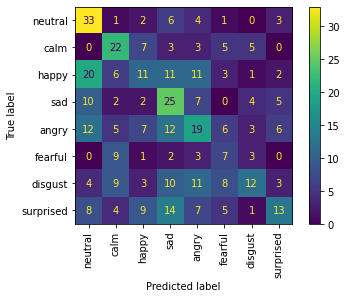

In [118]:
labels = [
    "neutral",
    "calm",
    "happy",
    "sad",
    "angry",
    "fearful",
    "disgust",
    "surprised"
]

cm = confusion_matrix(y_test, dtree_predictions)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(xticks_rotation='vertical')


# Support vector matchine (SVM)

In [103]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

In [105]:
print(accuracy_score(y_true=y_test,y_pred=svm_predictions))
print(classification_report(y_test,svm_predictions)) 

0.5034802784222738
              precision    recall  f1-score   support

       angry       0.53      0.56      0.54        50
        calm       0.51      0.76      0.61        45
     disgust       0.57      0.52      0.54        65
     fearful       0.59      0.55      0.57        55
       happy       0.49      0.50      0.49        70
     neutral       0.35      0.32      0.33        25
         sad       0.38      0.38      0.38        60
   surprised       0.56      0.41      0.47        61

    accuracy                           0.50       431
   macro avg       0.50      0.50      0.49       431
weighted avg       0.51      0.50      0.50       431



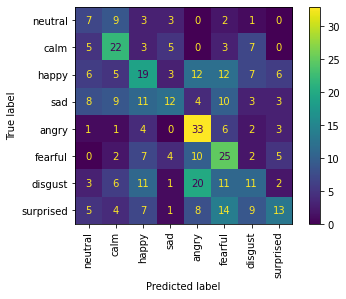

In [116]:
labels = [
    "neutral",
    "calm",
    "happy",
    "sad",
    "angry",
    "fearful",
    "disgust",
    "surprised"
]

cm_svm = confusion_matrix(y_test, svm_predictions, labels, normalize='all')

cmd_svm = ConfusionMatrixDisplay(cm, display_labels=labels)


cmd_svm.plot(xticks_rotation='vertical')


# Random Forest


In [120]:

rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf.fit(X_train, y_train)   

rf_predictions = rf.predict(X_test) 

In [124]:
print(accuracy_score(y_true=y_test,y_pred=rf_predictions))
print(classification_report(y_test,rf_predictions)) 

0.5150812064965197
              precision    recall  f1-score   support

       angry       0.55      0.64      0.59        50
        calm       0.46      0.89      0.61        45
     disgust       0.55      0.48      0.51        65
     fearful       0.62      0.51      0.56        55
       happy       0.50      0.30      0.37        70
     neutral       0.48      0.52      0.50        25
         sad       0.47      0.37      0.41        60
   surprised       0.51      0.57      0.54        61

    accuracy                           0.52       431
   macro avg       0.52      0.53      0.51       431
weighted avg       0.52      0.52      0.50       431



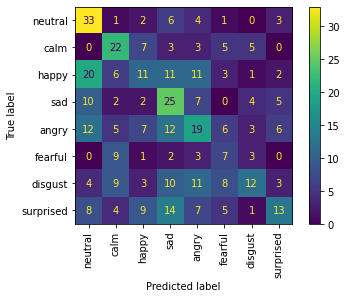

In [125]:
cm_rf = confusion_matrix(y_test, rf_predictions, labels, normalize='all')

cmd_rf = ConfusionMatrixDisplay(cm, display_labels=labels)


cmd_rf.plot(xticks_rotation='vertical')
